# Tutorial 2
## Name: Soham Sahasrabuddhe
## Roll Number: 23B1848

In [23]:
#Basic imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso

# Question 1

In [24]:
x_min = float(input("Enter minimum"))
x_max = float(input("Enter maximum"))

N = int(input("Enter total bins"))

m = float(input("Value of m"))
c = float(input("Value of c"))
a1 = float(input("Value of a1"))
a2 = float(input("Value of a2"))

h = (x_max - x_min)/N  # Step Size

x_val = np.zeros(N+1)
y_val = np.zeros(N+1)

x = x_min
for i in range(N + 1):
    x_val[i] = x
    rnd1 = np.random.uniform(-0.5, 0.5)
    rnd2 = np.random.uniform(-0.5, 0.5)
    y_val[i] = (m + a1 * rnd1) * x + c + a2 * rnd2
    x += h

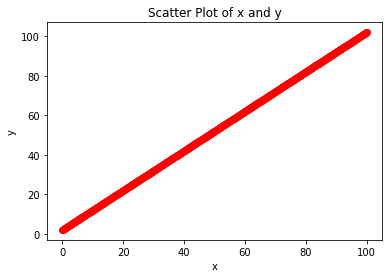

In [25]:
# The Plot
plt.scatter(x_val, y_val, c = 'r')
plt.title('Scatter Plot of x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Using Linear Regression

In [26]:
index = np.arange(N+1)
np.random.shuffle(index)  # Creating test and training data randomly

split = int(0.7*(N+1))

train_x = x_val[index[:split]]
train_y = y_val[index[:split]]

test_x = x_val[index[split:]]
test_y = y_val[index[split:]]

In [27]:
n = len(train_x)
beta_1 = ((np.mean(train_x))*(np.mean(train_y)) - np.mean(train_x*train_y))/(np.mean(train_x)**2 - np.mean(train_x**2))
beta_0 = (np.mean(train_y) - beta_1*np.mean(train_x))

best_y = beta_0 + beta_1 * test_x

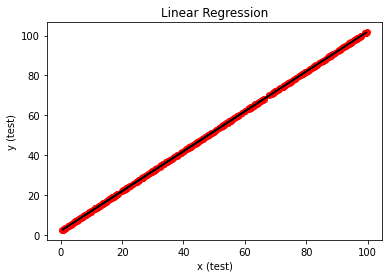

In [28]:
plt.scatter(test_x, test_y, c = 'r')
plt.plot(test_x,best_y,c = 'black')
plt.title('Linear Regression')
plt.xlabel('x (test)')
plt.ylabel('y (test)')
plt.show()

In [29]:
mse_test = np.mean((test_y - best_y)**2)
print(mse_test)

4.2925471727148745e-28


### Using Ridge and Lasso Regression

In [30]:
index = np.arange(N+1)
np.random.shuffle(index)  # Creating test and training data randomly

train_split = int(0.7*(N+1))
val_split = int(0.15 * (N + 1))

train_x = x_val[index[:train_split]].reshape(-1,1) # Gives error if not reshaped
train_y = y_val[index[:train_split]]

val_x = x_val[index[train_split:train_split + val_split]].reshape(-1,1)
val_y = y_val[index[train_split:train_split + val_split]]

test_x = x_val[index[train_split + val_split:]].reshape(-1,1)
test_y = y_val[index[train_split + val_split:]]

lamb = 1 # Hyperparameter

# Ridge Regression
ridge = Ridge(alpha=lamb)
ridge.fit(train_x, train_y)
y_pred = ridge.predict(val_x)
mse = np.mean((y_pred - val_y) ** 2)
print(f'MSE for Ridge Regression: {mse}')

# Lasso Regression
lasso = Lasso(alpha=lamb)
lasso.fit(train_x, train_y)
y_pred = lasso.predict(val_x)
mse = np.mean((y_pred - val_y) ** 2)
print(f'MSE for Lasso Regression: {mse}')

MSE for Ridge Regression: 2.4673124374553674e-09
MSE for Lasso Regression: 0.0012089871424003356
